## Feature Importance with Neural Network

[article link](https://towardsdatascience.com/feature-importance-with-neural-network-346eb6205743)

One of the best challenge in Machine Learning tends to let model speak them self. Not also is important to develop a strong solution with great predicting power, but also in lot of business applications is interesting to know how the model provides these results: which variables are engage the most, the presence of correlations, the possible causation relationships and so on.
These needs made Tree based model a good weapon in this field. They are scalable and permits to compute variable explanation very easy. Every software provide this option and each of us has at least once tried to compute the variable importance report with Random Forest or similar. With Neural Net this kind of benefit is considered as taboo. Neural Network are often seen as black box, from which is very difficult to extract usefull information for other purpose like feature explatations.


Given a real dataset we try to investigate which factors influence the final predition performances. To achive this aim we took data from UCI Machine Learning Repository. The privileged dataset was the Combined Cycle Power Plant Dataset, where were collected 6 years of data when the power plant was set to work with full load. Features consist of hourly average variables: Ambient Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.
The variables engaged are related by pearson correlation linkages as shown in the matrix below.

![](https://miro.medium.com/max/427/1*onJboeH-8vyI9WEZ7VQmaw.png)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tqdm

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

from keras.models import *
from keras.layers import *

In [5]:
### READ DATA ###
df = pd.read_excel('./Folds5x2_pp.xlsx')

print (df.shape)

df.head()

(9568, 5)


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [14]:
### TRAIN TEST SPLIT ###
X, y = ['AT','V','AP','RH'], ['PE']
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size = 0.2, random_state = 42)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7654, 4) (1914, 4) (7654, 1) (1914, 1)


### GradientBoosting Feature Importances

In [20]:
### FIT GRADIENTBOOSTING ###
rf = GradientBoostingRegressor(n_estimators=100)
rf.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
### PREDICTION ERROR ON TEST DATA ###
print (mean_absolute_error(y_test, rf.predict(X_test)))

2.9492028774889936


In [22]:
print (rf.feature_importances_)

[0.82890837 0.15763337 0.0072511  0.00620716]


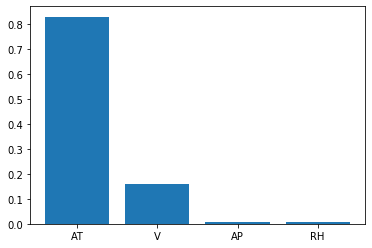

In [24]:
### FEATURE IMPORTANCES REPORT ###
plt.bar(range(X_train.shape[1]), rf.feature_importances_);
plt.xticks(range(X_train.shape[1]), ['AT','V','AP','RH']);

### Permutation Importance

In [25]:
### SCALE DATA FOR NN ###
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

In [26]:
### DEFINE NN STRUCTURE ###

inp = Input(shape=(scaled_train.shape[1],))
x = Dense(128, activation='relu')(inp)
x = Dense(32, activation='relu')(x)
out = Dense(1)(x)

model = Model(inp, out)
model.compile(optimizer='adam', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [41]:
### FIT NN ###
model.fit(scaled_train, (y_train - y_train.mean())/y_train.std() , epochs=100, batch_size=128 ,verbose=2)

Epoch 1/100
 - 0s - loss: 0.4446
Epoch 2/100
 - 0s - loss: 0.4344
Epoch 3/100
 - 0s - loss: 0.4246
Epoch 4/100
 - 0s - loss: 0.4152
Epoch 5/100
 - 0s - loss: 0.4062
Epoch 6/100
 - 0s - loss: 0.3974
Epoch 7/100
 - 0s - loss: 0.3890
Epoch 8/100
 - 0s - loss: 0.3808
Epoch 9/100
 - 0s - loss: 0.3728
Epoch 10/100
 - 0s - loss: 0.3651
Epoch 11/100
 - 0s - loss: 0.3575
Epoch 12/100
 - 0s - loss: 0.3502
Epoch 13/100
 - 0s - loss: 0.3430
Epoch 14/100
 - 0s - loss: 0.3360
Epoch 15/100
 - 0s - loss: 0.3291
Epoch 16/100
 - 0s - loss: 0.3224
Epoch 17/100
 - 0s - loss: 0.3159
Epoch 18/100
 - 0s - loss: 0.3094
Epoch 19/100
 - 0s - loss: 0.3032
Epoch 20/100
 - 0s - loss: 0.2970
Epoch 21/100
 - 0s - loss: 0.2910
Epoch 22/100
 - 0s - loss: 0.2851
Epoch 23/100
 - 0s - loss: 0.2793
Epoch 24/100
 - 0s - loss: 0.2736
Epoch 25/100
 - 0s - loss: 0.2681
Epoch 26/100
 - 0s - loss: 0.2626
Epoch 27/100
 - 0s - loss: 0.2573
Epoch 28/100
 - 0s - loss: 0.2521
Epoch 29/100
 - 0s - loss: 0.2470
Epoch 30/100
 - 0s - lo

In [43]:
### PREDICTION ERROR ON TEST DATA ###
real_pred = model.predict(scaled_test).ravel() * y_train.std()[0] + y_train.mean()[0]
MAE = mean_absolute_error(y_test, model.predict(scaled_test).ravel() * y_train.std()[0] + y_train.mean()[0])
MAE

3.6318127951626993

In [50]:
np.random.permutation([1,2,3])

array([1, 3, 2])

In [51]:
### COMPUTE PERMUTATION AND SCORING ###
np.random.seed(33)

final_score = []
shuff_pred = []

for i, col in enumerate(X_test.columns):
    
    ## shuffle col
    
    shuff_test = scaled_test.copy()
    shuff_test [:, i] = np.random.permutation(shuff_test [:, i])
    
    ## compute score on shuffled data
    score = mean_absolute_error(y_test, model.predict(shuff_test).ravel() *y_train.std()[0]+y_train.mean()[0])
    shuff_pred.append(model.predict(shuff_test).ravel() *y_train.std()[0]+y_train.mean()[0])
    
    final_score.append(score)
    
final_score = np.asarray(final_score)


In [52]:
final_score

array([15.9010128 ,  6.06188866,  4.20940567,  4.04728529])

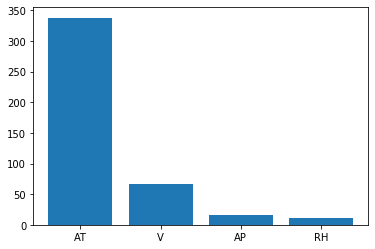

In [54]:
### PERMUTATION IMPORTANCE REPORT ###
plt.bar(range(X_train.shape[1]), (final_score - MAE)/MAE*100);
plt.xticks(range(X_train.shape[1]), ['AT','V','AP','RH']);